In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, linregress, norm, lognorm
from collections.abc import Iterable
import math
import time
import random
import pickle as pkl
from cratrcountr import *
%matplotlib inline

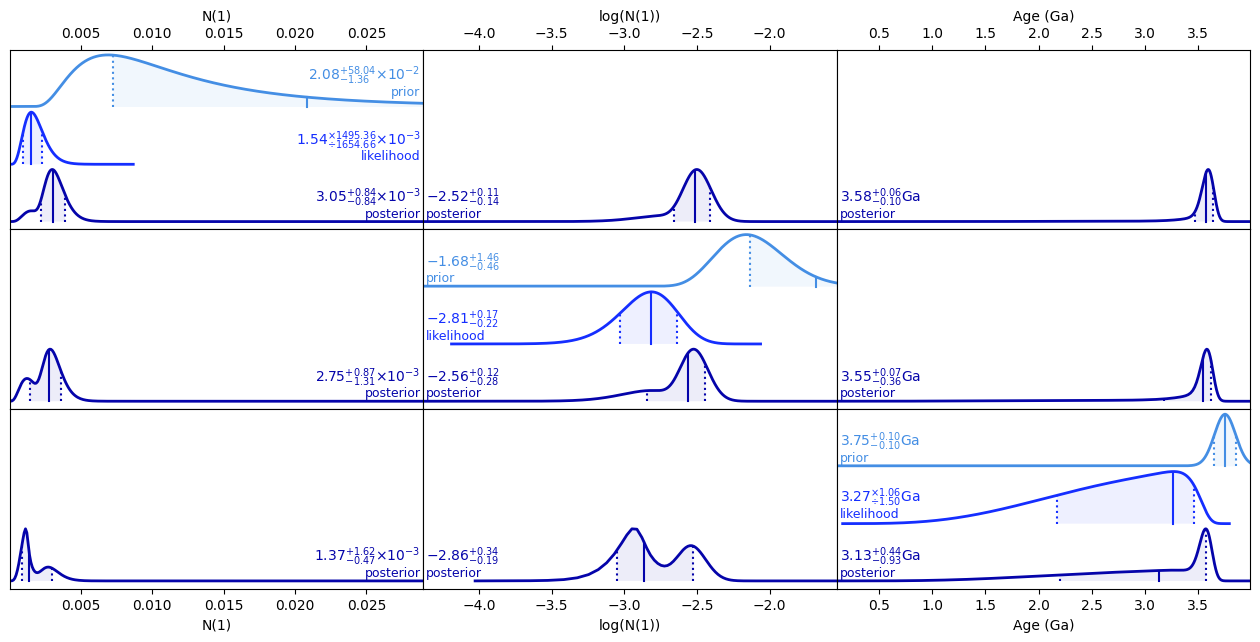

In [2]:
non_echus_ages = np.array([
    3.83, 3.93, 3.74, 3.72, 3.86, 3.76, 3.71, 3.79,
    3.85, 3.90, 3.73, 3.79, 3.85, 3.80, 3.83, 3.69,
    3.75, 3.74, 3.70, 3.74, 3.71, 3.81, 3.79, 3.77,
    3.78, 3.50, 3.55, 3.52
])

non_echus_N1 = ncf_mars(non_echus_ages)

echus_area = 5 / ncf_mars(3.27)

N1_likelihood = N1_pdf(
    5, echus_area, 1, pf=npf_mars
)
log_N1_likelihood = N1_likelihood.log()
age_likelihood = age_scaled_N1_pdf(
    5, echus_area, 1, pf=npf_mars, cf_inv=ncf_mars_inv
)

T = np.linspace(0, 4.5, 10000)
fh08_mean = np.mean(non_echus_ages)
fh08_std = np.std(non_echus_ages)
P = norm.pdf(T, loc=fh08_mean, scale=fh08_std)
age_prior = RandomVariable(
    T, P + 0.01 * P.max(),
    val=fh08_mean, 
    low=fh08_mean - fh08_std, 
    high=fh08_mean + fh08_std,
    kind='median'
)
N1_prior = age_prior.scale(ncf_mars)
log_N1_prior = N1_prior.log()


age_posterior = age_prior.update(age_likelihood)
N1_posterior = N1_prior.update(N1_likelihood)
log_N1_posterior = log_N1_prior.update(log_N1_likelihood)

age_posterior_N1 = age_posterior.as_kind('median').apply(ncf_mars)


fig = plt.figure(figsize=(16, 7))
age_xlim = [0.1, 3.99]
N1_xlim = ncf_mars(np.array(age_xlim))
log_N1_xlim = np.log10(N1_xlim)

rvs_list = [
    [N1_prior, N1_likelihood, N1_posterior],
    [N1_posterior[N1_posterior.X > 0].apply(np.log10, kind='median')],
    [N1_posterior.apply(ncf_mars_inv, kind='median')],
    [log_N1_posterior.ten2the().as_kind('median')],
    [log_N1_prior, log_N1_likelihood, log_N1_posterior],
    [log_N1_posterior.as_kind('median').ten2the().apply(ncf_mars_inv)],
    [age_posterior_N1],
    [age_posterior_N1[age_posterior_N1.X > 0].apply(np.log10)],
    [age_prior, age_likelihood, age_posterior]
]
bayesian_labels = ['prior', 'likelihood', 'posterior']
pdf_labels_list = [
    bayesian_labels, bayesian_labels[2], bayesian_labels[2],
    bayesian_labels[2], bayesian_labels, bayesian_labels[2],
    bayesian_labels[2], bayesian_labels[2], bayesian_labels
]
xlim_list = [
    N1_xlim, log_N1_xlim, age_xlim,
    N1_xlim, log_N1_xlim, age_xlim,
    N1_xlim, log_N1_xlim, age_xlim,
]
cs_list = [
    cs, cs[2], cs[2],
    cs[2], cs, cs[2],
    cs[2], cs[2], cs
]

for i in np.arange(9):
    ax = fig.add_subplot(331 + i)
    plt.yticks([])
    if i % 3 == 2:
        unit = 'Ga'
    else:
        unit = None
    plot_pdfs(
        rvs_list[i], xlim=xlim_list[i], label=True,
        pdf_label=pdf_labels_list[i], color=cs_list[i],
        unit=unit
    )
    if i < 3:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
    elif i < 6:
        plt.xticks([])
    xlabel_dict = {0 : 'N(1)', 1: 'log(N(1))', 2 : 'Age (Ga)'}
    plt.xlabel(xlabel_dict[i % 3])
    plt.ylim([-0.15, 3.3])
        
plt.subplots_adjust(wspace=0, hspace=0)

pfig = plt.gcf()
pfig.savefig('figs/martian_valley_example.with_log.pdf', bbox_inches='tight')

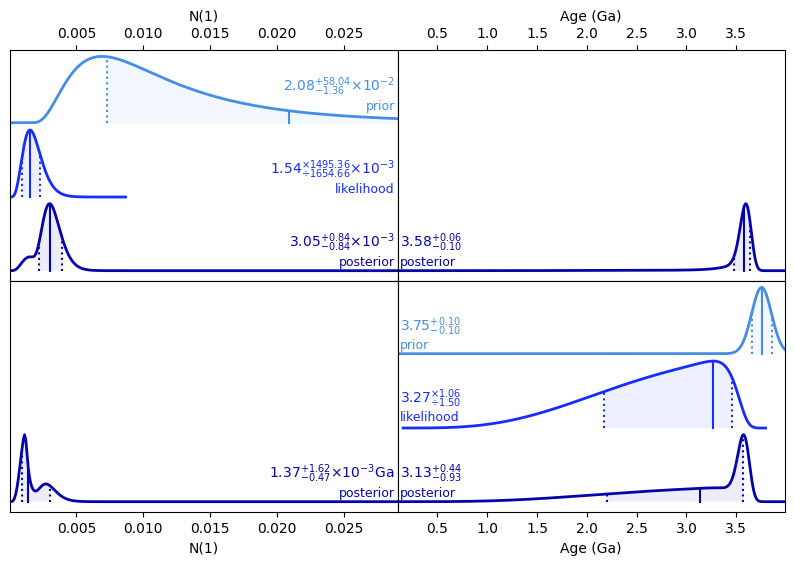

In [3]:
non_echus_ages = np.array([
    3.83, 3.93, 3.74, 3.72, 3.86, 3.76, 3.71, 3.79,
    3.85, 3.90, 3.73, 3.79, 3.85, 3.80, 3.83, 3.69,
    3.75, 3.74, 3.70, 3.74, 3.71, 3.81, 3.79, 3.77,
    3.78, 3.50, 3.55, 3.52
])

non_echus_N1 = ncf_mars(non_echus_ages)

echus_area = 5 / ncf_mars(3.27)

N1_likelihood = N1_pdf(
    5, echus_area, 1, pf=npf_mars
)
log_N1_likelihood = N1_likelihood.log()
age_likelihood = age_scaled_N1_pdf(
    5, echus_area, 1, pf=npf_mars, cf_inv=ncf_mars_inv
)

T = np.linspace(0, 4.5, 10000)
fh08_mean = np.mean(non_echus_ages)
fh08_std = np.std(non_echus_ages)
P = norm.pdf(T, loc=fh08_mean, scale=fh08_std)
age_prior = RandomVariable(
    T, P + 0.01 * P.max(),
    val=fh08_mean, 
    low=fh08_mean - fh08_std, 
    high=fh08_mean + fh08_std,
    kind='median'
)
N1_prior = age_prior.scale(ncf_mars)
log_N1_prior = N1_prior.log()


age_posterior = age_prior.update(age_likelihood)
N1_posterior = N1_prior.update(N1_likelihood)
log_N1_posterior = log_N1_prior.update(log_N1_likelihood)

age_posterior_N1 = age_posterior.as_kind('median').apply(ncf_mars)


fig = plt.figure(figsize=(10, 6))
age_xlim = [0.1, 3.99]
N1_xlim = ncf_mars(np.array(age_xlim))
log_N1_xlim = np.log10(N1_xlim)

rvs_list = [
    [N1_prior, N1_likelihood, N1_posterior],
    [N1_posterior.apply(ncf_mars_inv, kind='median')],
    [age_posterior_N1],
    [age_prior, age_likelihood, age_posterior]
]
bayesian_labels = ['prior', 'likelihood', 'posterior']
pdf_labels_list = [
    bayesian_labels, bayesian_labels[2], 
    bayesian_labels[2], bayesian_labels
]
xlim_list = [
    N1_xlim, age_xlim,
    N1_xlim, age_xlim,
]
cs_list = [
    cs, cs[2],
    cs[2], cs
]

for i in np.arange(4):
    ax = fig.add_subplot(221 + i)
    plt.yticks([])
    if i % 3 == 2:
        unit = 'Ga'
    else:
        unit = None
    plot_pdfs(
        rvs_list[i], xlim=xlim_list[i], label=True,
        pdf_label=pdf_labels_list[i], color=cs_list[i],
        unit=unit
    )
    if i < 2:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
    xlabel_dict = {0 : 'N(1)', 1 : 'Age (Ga)'}
    plt.xlabel(xlabel_dict[i % 2])
    plt.ylim([-0.15, 3.3])
        
plt.subplots_adjust(wspace=0, hspace=0)

pfig = plt.gcf()
pfig.savefig('figs/martian_valley_example.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

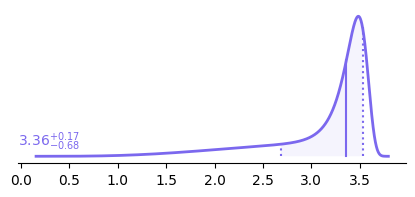

In [4]:
echus_area = 5 / ncf_mars(3.27)
age_rv = age_pdf(
    5, echus_area,  1, pf=npf_mars, cf_inv=ncf_mars_inv
).as_kind('median')
age_rv.plot(label='True')

<Figure size 640x480 with 0 Axes>

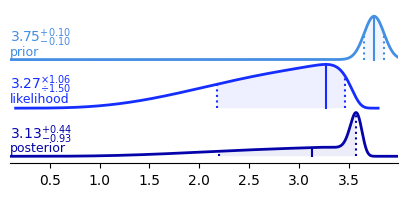

In [6]:
i = 3
rvs = [age_prior, age_likelihood, age_posterior]
plot_pdfs(
    rvs, xlim=xlim_list[i], label=True, label_color='same',
    pdf_label=pdf_labels_list[i], color=cs_list[i]
)

<Figure size 640x480 with 0 Axes>

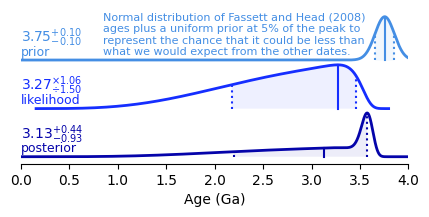

In [7]:
plot_pdfs(
    rvs, xlim=[0, 4], label=True, label_color='same',
    pdf_label=pdf_labels_list[i], color=cs_list[i]
)
plt.text(
    0.85, 3.3, 
    str(
        'Normal distribution of Fassett and Head (2008)\n'
        'ages plus a uniform prior at 5% of the peak to\n'
        'represent the chance that it could be less than\n'
        'what we would expect from the other dates.'
    ), 
    ha='left', va='top', size=8, color=cs[0]
)
plt.xlabel('Age (Ga)')
pfig = plt.gcf()
pfig.savefig('figs/martian_valley_example_age_space.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

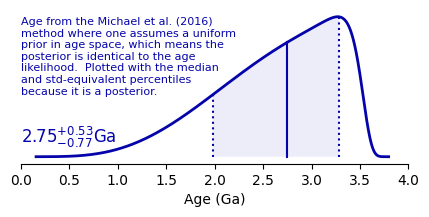

In [8]:
age_likelihood.plot(
    label=True, color=cs[2], label_text_size=12, error_bar_type='median',
    unit='Ga', xlim=[0, 4]
)
plt.text(
    0, 1, (
        'Age from the Michael et al. (2016)\n'
        'method where one assumes a uniform\n'
        'prior in age space, which means the\n'
        'posterior is identical to the age\n'
        'likelihood.  Plotted with the median\n'
        'and std-equivalent percentiles\n'
        'because it is a posterior.'
    ), ha='left', va='top', size=8, color=cs[2]
)
plt.xlabel('Age (Ga)')
pfig = plt.gcf()
pfig.savefig('figs/martian_valley_example_M16.pdf', bbox_inches='tight')